Epoch 1/5
1563/1563 [==============================] - 11s 7ms/step - loss: 4.9850 - accuracy: 0.0999 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/5
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3035 - accuracy: 0.0988 - val_loss: 2.3029 - val_accuracy: 0.1000
Epoch 3/5
1563/1563 [==============================] - 10s 7ms/step - loss: 2.3028 - accuracy: 0.0991 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/5
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3025 - val_accuracy: 0.1000
Epoch 5/5
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3032 - accuracy: 0.0968 - val_loss: 2.3025 - val_accuracy: 0.1001


Text(0.5, 1.0, 'val loss')

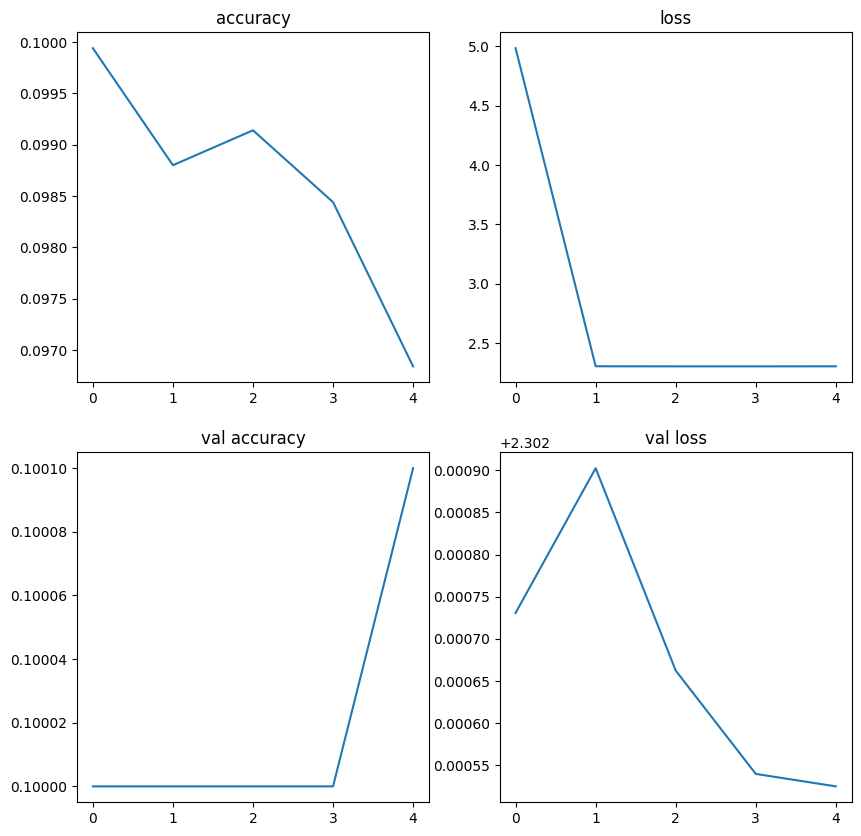

In [2]:
# -*- coding: utf-8 -*-
"""Copy of Neural Networks HW4.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/12rrrGewrOBqyyO8VaAHGVdPrV9CB859z

***Saeed Shakoori - 4001334026 - Neuron network - USC ***
"""

import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Dropout
import keras
import matplotlib.pyplot as plt
import numpy as np

# Getting the dataset

cifar_10 = keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar_10.load_data()

# Trainging the network

model = tf.keras.models.Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(170, activation='relu'),
    Dropout(0.1),
    Dense(90, activation='relu'),
    Dense(48, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Running the model

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32, epochs=5)

# Getting weights of the trained network

layer1 = model.layers[-1]
W1 = layer1.get_weights()

layer2 = model.layers[3]
W2 = layer2.get_weights()

layer3 = model.layers[4]
W3 = layer3.get_weights()

layer4 = model.layers[6]
W4 = layer4.get_weights()

# Extracting all the weights of each neuron to a list

def extracting_weights(layer):
  final_weights = []
  layer_temp = layer[0]

  for i in layer_temp:
    for z in i:
      final_weights.append(z)
  return final_weights


final_weights_1 = extracting_weights(W1)
temp = len(final_weights_1)
W1_axis = list(range(temp))

final_weights_2 = extracting_weights(W2)
temp = len(final_weights_2)
W2_axis = list(range(temp))

final_weights_3 = extracting_weights(W3)
temp = len(final_weights_3)
W3_axis = list(range(temp))

final_weights_4 = extracting_weights(W4)
temp = len(final_weights_4)
W4_axis = list(range(temp))

# Plotting the last weights based on their indexs

# plt.scatter(W1_axis,final_weights_1 )
# plt.title("Layer1")
# plt.show()
# plt.scatter(W2_axis,final_weights_2 )
# plt.title("Layer2")
# plt.show()
# plt.scatter(W3_axis,final_weights_3 )
# plt.title("Layer3")
# plt.show()
# plt.scatter(W4_axis,final_weights_4 )
# plt.title("Layer4")
# plt.show()

# Plotting the outputs of the network

fig, ax = plt.subplots(2, 2, figsize=(10,10))
ax[0][0].plot(history.history['accuracy'])
ax[0][0].set_title('accuracy')
ax[0][1].plot(history.history['loss'])
ax[0][1].set_title('loss')
ax[1][0].plot(history.history['val_accuracy'])
ax[1][0].set_title('val accuracy')
ax[1][1].plot(history.history['val_loss'])
ax[1][1].set_title('val loss')